# Modern Portfolio Theory (practical session)

- Toying with Markowitz in Python.  
-Lots of material online (search on Google!). Some useful blog posts: - Stock Data Analysis
with Python (https://ntguardian.wordpress.com/2018/07/17/stock-data-analysis-python-v2/)  
- Efficient Frontier Portfolio Optimisation in Python (https://towardsdatascience.com/efficientfrontier-portfolio-optimisation-in-python-e7844051e7f)   
- Markowitz Portfolio Optimization in Python (https://plot.ly/ipython-notebooks/markowitz-portfolio-optimization/)  
Need to install the libraries, if first use. To install packages, run the following at the appropriate command prompt: ‘conda install ’name of package”, example:  
 1. conda install pandas  
 2. conda install seaborn    

- import the module

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as fy
import pandas as plt
import matplotlib.pyplot as plt
%matplotlib inline
#import scipy.optimize as sco
plt.style.use('fivethirtyeight')
np.random.seed(777)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Stock data analysis  
Stock data can be obtained from Yahoo! Finance, Google Finance. . . I will use here Yahoo! Finance.

- we will look at stock prices over one year

In [4]:
start = '2016-10-01'
end = '2017-09-30'

In [5]:
aapl = fy.download('AAPL', start, end)
aapl.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-09-30,28.115000,28.342501,27.950001,28.262501,26.467089,145516400
2016-10-03,28.177500,28.262501,28.070000,28.129999,26.343004,86807200
2016-10-04,28.264999,28.577499,28.157499,28.250000,26.455381,118947200
2016-10-05,28.350000,28.415001,28.172501,28.262501,26.467089,85812400
2016-10-06,28.424999,28.584999,28.282499,28.472500,26.663748,115117200


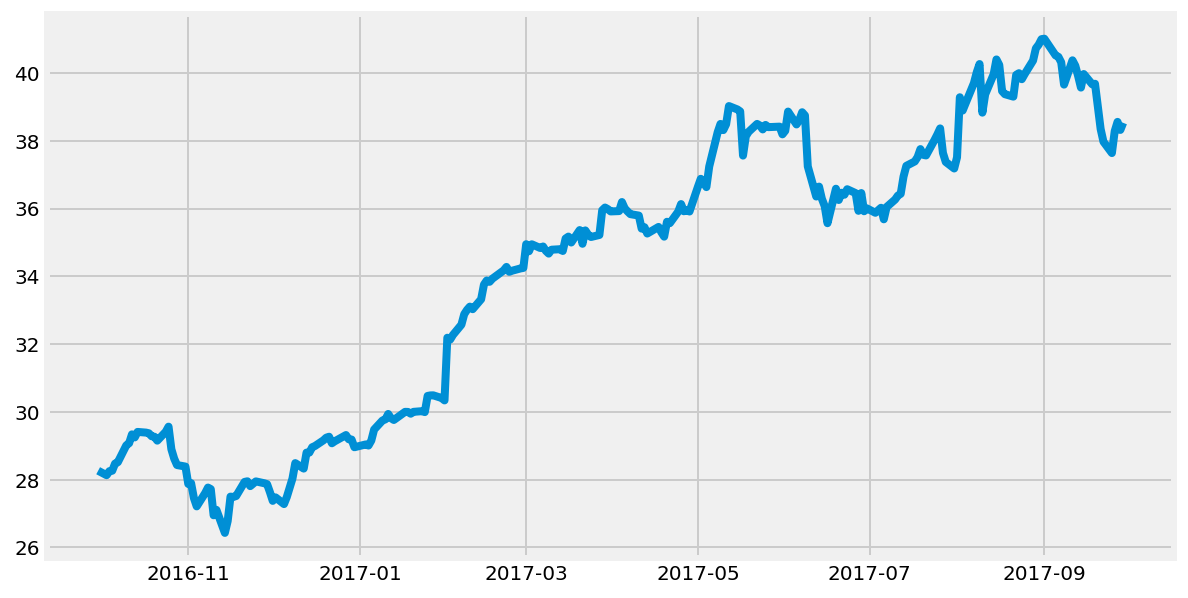

In [6]:
plt.figure(figsize=(9,5))
plt.plot(aapl.Close);

We now consider multiple stocks, which constitute our investment universe.

In [8]:
stocks = ['AAPL','GE','JPM','KO']
#stocks = ['AAPL','AMZN','FB','GE','GOOG','JPM','KO',] #Add more stocks to show ,!sparsity of efficient frontier
data = fy.download(stocks, start, end, paginate=True)
data.head()

[*********************100%***********************]  4 of 4 completed


Adj Close                                        Close  \
                 AAPL          GE        JPM         KO       AAPL   
Date                                                                 
2016-09-30  26.467091  210.339233  57.678280  35.931267  28.262501   
2016-10-03  26.343006  210.481247  57.608978  35.685043  28.129999   
2016-10-04  26.455385  209.487106  58.106281  35.523727  28.250000   
2016-10-05  26.467091  209.487106  59.057278  35.498253  28.262501   
2016-10-06  26.663752  207.853790  59.214310  35.413357  28.472500   

                                                   High              ...  \
                    GE        JPM         KO       AAPL          GE  ...   
Date                                                                 ...   
2016-09-30  227.846161  66.589996  42.320000  28.342501  229.615387  ...   
2016-10-03  228.000000  66.510002  42.029999  28.262501  228.461533  ...   
2016-10-04  226.923080  66.599998  41.840000  28.577499  228.846161  ...   
2016-10-05  226.923080  67.690002  41.810001  28.415001  228.461533  ...   
2016-10-06  225.153839  67.870003  41.709999  28.584999  226.923080  ...   

                  Low                  Open                                    \
                  JPM         KO       AAPL          GE        JPM         KO   
Date                                                                            
2016-09-30  66.080002  42.060001  28.115000  227.692307  66.080002  42.209999   
2016-10-03  66.260002  41.889999  28.177500  226.615387  66.349998  42.310001   
2016-10-04  66.099998  41.779999  28.264999  228.538467  66.209999  42.340000   
2016-10-05  66.800003  41.669998  28.350000  227.076920  66.889999  41.930000   
2016-10-06  67.050003  41.580002  28.424999  226.153839  67.730003  41.680000   

               Volume                               
                 AAPL       GE       JPM        KO  
Date                                                
2016-09-30  145516400  4695600  21680100  14375700  
2016-10-03   86807200  2573233  14901700  11152800  
2016-10-04  118947200  4046601  17226900  13682700  
2016-10-05   85812400  3241797  16280000   9607300  
2016-10-06  115117200  3651427  17485000   9722900  

[5 rows x 24 columns]

In [9]:
dataClose=data.Close
dataClose.head()

,AAPL,GE,JPM,KO
Date,,,,
2016-09-30,28.262501,227.846161,66.589996,42.320000
2016-10-03,28.129999,228.000000,66.510002,42.029999
2016-10-04,28.250000,226.923080,66.599998,41.840000
2016-10-05,28.262501,226.923080,67.690002,41.810001
2016-10-06,28.472500,225.153839,67.870003,41.709999


Let’s first look at how the price of each stock has evolved within give time frame.

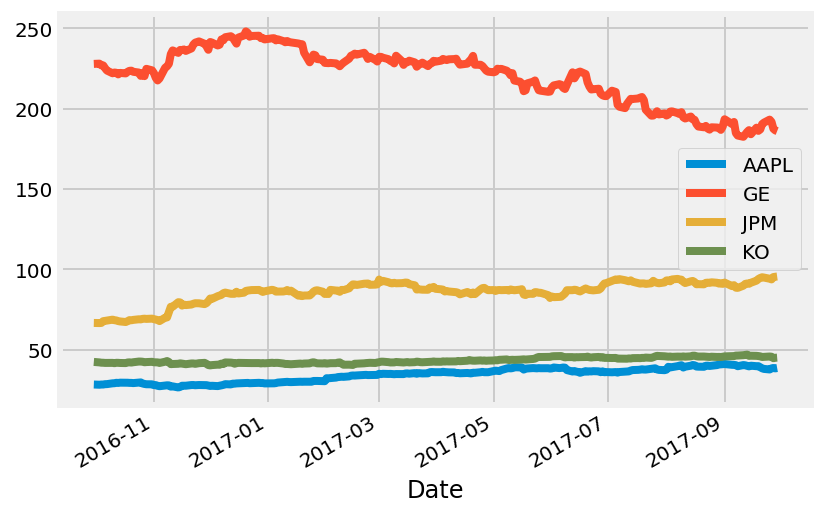

In [10]:
dataClose.plot()

What’s wrong with this chart? While absolute price is important (pricy stocks are difficult to
purchase, which affects not only their volatility but your ability to trade that stock), when trading,
we are more concerned about the relative change of an asset rather than its absolute price. Apple’s
stocks are much more expensive than the others, and the other stocks appear much less volatile
than they truly are (their price appears to not deviate much).

Normalization: start all the stocks at 100:  
        $$ S_{t}^{i}=100 \times \frac{S_{t}^{i}}{S_{0}}, \quad i=1, \ldots , n\  assets $$  
 This will require transforming the data in the stocks object. (use a lambda function, which allows
to pass a small function defined quickly as a parameter to another function or method.)

In [12]:
#df.apply(arg) will apply the function arg to each column in df, and return a,!DataFrame with the result
# Recall that lambda x is an anonymous function accepting parameter x; in this ,!case, x will be a pandas Series object
dataClose_100 = dataClose.apply(lambda x: 100*x / x[0])
dataClose_100.head()

,AAPL,GE,JPM,KO
Date,,,,
2016-09-30,100.000000,100.000000,100.000000,100.000000
2016-10-03,99.531175,100.067519,99.879871,99.314743
2016-10-04,99.955769,99.594867,100.015020,98.865786
2016-10-05,100.000000,99.594867,101.651909,98.794900
2016-10-06,100.743031,98.818360,101.922220,98.558600


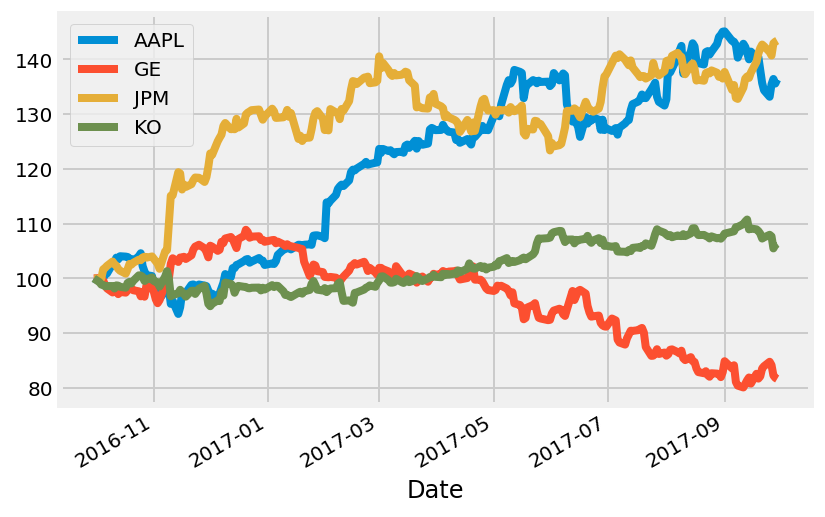

In [13]:
dataClose_100.plot()

This is a much more useful plot. We can now see how profitable each stock was since the beginning of the period, how the stocks are correlated, how volatile each stock was, etc. . .  
Alternatively, we could also plot the change of each stock per day, by computing the daily returns:  
$$ R_{t}^{i}=\frac{S_{t}^{i}}{S_{t-1}^{i}}-1 $$  

In [14]:
returns = dataClose_100.apply(lambda x: (x / (x.shift(1)))-1) # shift moves dates back by 1.
returns.head()

,AAPL,GE,JPM,KO
Date,,,,
2016-09-30,NaN,NaN,NaN,NaN
2016-10-03,-0.004688,0.000675,-0.001201,-0.006853
2016-10-04,0.004266,-0.004723,0.001353,-0.004521
2016-10-05,0.000443,0.000000,0.016366,-0.000717
2016-10-06,0.007430,-0.007797,0.002659,-0.002392


In [15]:
returns=returns.iloc[1:] #drop first row
returns.head()

,AAPL,GE,JPM,KO
Date,,,,
2016-10-03,-0.004688,0.000675,-0.001201,-0.006853
2016-10-04,0.004266,-0.004723,0.001353,-0.004521
2016-10-05,0.000443,0.000000,0.016366,-0.000717
2016-10-06,0.007430,-0.007797,0.002659,-0.002392
2016-10-07,0.001493,-0.006491,0.003536,0.000480


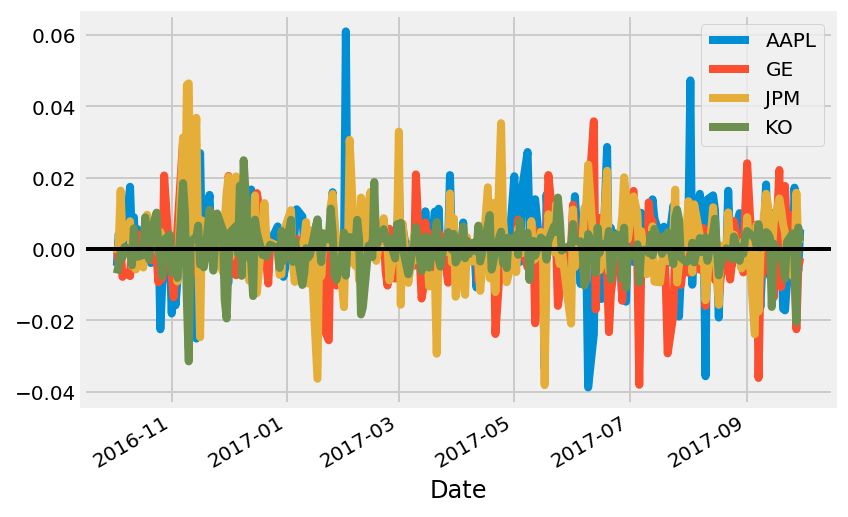

In [16]:
returns.plot(grid = True).axhline(y = 0, color = "black", lw = 2)

Coca-Cola (KO) seems to be the less volatile ot these stocks.

In [17]:
total_return=dataClose_100.apply(lambda x: (x[-1] / x[0])-1)
print(total_return)

AAPL    0.363290
GE     -0.183660
JPM     0.434300
KO      0.063563
dtype: float64


In [18]:
from math import sqrt
standarddev=returns.apply(lambda x: x.std()*sqrt(252))
print(standarddev)

AAPL    0.172228
GE      0.154821
JPM     0.173257
KO      0.101976
dtype: float64


In [19]:
sharpe=total_return/standarddev
print(sharpe)

AAPL    2.109361
GE     -1.186270
JPM     2.506678
KO      0.623315
dtype: float64


## Efficient frontier for long-only portfolios

Fix a risk aversion $ \lambda>0 $ and consider Markowitz optimization problem:  
$$ \max _{w \in \mathbb{R}^{d}} \mu^{\top} w-\frac{\lambda}{2} w^{\top} \Sigma w $$
subject to some weight constraints

In the theoretical part of the course, we solved the problem analytically for the 1. unconstrained
case, 2. ‘no-investment’ in the non-risky case,i.e.
$$ \sum_{i=1}^{d} w_{i}=1 $$

In both cases, we obtained closed form solutions for the optimal portfolios (capital market line and efficient frontier).  
In this section, we will consider the case of long-only portfolios fully invested in the risky assets.  
This corresponds to the following set of constraints:  
$$ \sum_{i=1}^{d} w_{i}=1, \quad $ and $ \quad w_{i} \geq 0, \quad i=1, \ldots, d $$  
In this case, we can no longer obtain closed form solutions. We will solve them using numerical optimization

### Estimating $ \hat{\mu} $ and $ \hat{\Sigma} $

(Derive Maximum Likelihood on Blackboard)

Given n days of observations, maximum likelihood estimator for mean vector$ \mu \in \mathbb{R}^{d} $ and covariance matrix$ \Sigma \in \mathbb{S}_{^{d}}^{d} $:  
$$ \hat{\mu}_{\mathrm{ML}}=\frac{1}{n} \sum_{i=1}^{n} R_{i} \quad $ and $ \quad{\Sigma}_{\mathrm{ML}}=\frac{1}{n} \sum_{i=1}^{n}\left(R_{i}-\mu\right)\left(R_{i}-\mu\right)^{\mathrm{\top}} $$

Let’s compute first the empirical mean $ \hat{\mu}_{\mathrm{ML}} $:

In [22]:
n_obs=(len(returns))
print('n =', n_obs)
mu_ML=returns.apply(lambda x: sum(x)/n_obs)
print(mu_ML)

n = 251
AAPL    0.001294
GE     -0.000761
JPM     0.001497
KO      0.000266
dtype: float64


In [23]:
print(np.mean(returns))

AAPL    0.001294
GE     -0.000761
JPM     0.001497
KO      0.000266
dtype: float64


Let’s compute first the empirical covariance matrix $ \hat{\Sigma}_{\mathrm{ML}} $:

In [25]:
Sigma_ML=np.dot((returns-np.mean(returns)).T,(returns-np.mean(returns)))/(n_obs)
print(Sigma_ML)

[[ 1.17238919e-04  2.51978823e-06  1.36119838e-05  9.94685716e-06]
 [ 2.51978823e-06  9.47384479e-05  3.16142912e-05  7.41910695e-06]
 [ 1.36119838e-05  3.16142912e-05  1.18644422e-04 -7.94305112e-06]
 [ 9.94685716e-06  7.41910695e-06 -7.94305112e-06  4.11020714e-05]]


Using the command np.cov we obtain:

In [26]:
print(np.cov(returns.T))

[[ 1.17707875e-04  2.52986738e-06  1.36664317e-05  9.98664459e-06]
 [ 2.52986738e-06  9.51174017e-05  3.17407484e-05  7.44878338e-06]
 [ 1.36664317e-05  3.17407484e-05  1.19119000e-04 -7.97482332e-06]
 [ 9.98664459e-06  7.44878338e-06 -7.97482332e-06  4.12664797e-05]]


We notice a small difference between the maximum likelihood  stimator and the output of np.conv.
The reason is that np.conv computes the following unbiased estimator for the covariance matrix:  
$$ \hat{\Sigma}_{\text {unbiased }}=\frac{n}{n-1} \hat{\Sigma}_{\mathrm{ML}} $$

Sanity check:

In [27]:
Sigma_unbiased= n_obs*Sigma_ML/(n_obs-1)
print(Sigma_unbiased)

[[ 1.17707875e-04  2.52986738e-06  1.36664317e-05  9.98664459e-06]
 [ 2.52986738e-06  9.51174017e-05  3.17407484e-05  7.44878338e-06]
 [ 1.36664317e-05  3.17407484e-05  1.19119000e-04 -7.97482332e-06]
 [ 9.98664459e-06  7.44878338e-06 -7.97482332e-06  4.12664797e-05]]


### Generating Random Portfolios

Let’s simulate random portfolios.

In [28]:
## NUMBER OF ASSETS
n_assets = len(stocks)
print(n_assets)

4


In [29]:
np.random.seed(1234)
np.random.rand(n_assets)

array([0.19151945, 0.62210877, 0.43772774, 0.78535858])

In [30]:
np.random.uniform(-1,1,n_assets)

array([ 0.55995162, -0.45481479, -0.44707149,  0.60374436])

Generate a random portfolio with weights summing to one: with and without short selling.

In [31]:
def rand_weights(n):
    ''' Produces n random weights that sum to 1 '''
    k = np.random.uniform(-1,1,n_assets)
    return k / sum(k)

In [32]:
def rand_weights_long(n):
    ''' Produces n random nonnegative weights that sum to 1 '''
    k = np.random.rand(n)
    return k / sum(k)


In [33]:
print(rand_weights(n_assets))
print(rand_weights_long(n_assets))

[ 0.66120606  0.54256185 -0.20520412  0.00143621]
[0.29363269 0.30619453 0.15906894 0.24110385]


### Efficient frontier

Let’s compute the random portfolios overall annualized returns and volatility

In [34]:
def random_portfolio(returns):
    '''
    Returns the mean and standard deviation of returns for a random portfolio
    '''
    p = np.asmatrix(np.mean(returns))
    w = np.asmatrix(rand_weights_long(n_assets))
    C = np.asmatrix(np.cov(returns.T))
    mu = w * p.T
    sigma = np.sqrt(w * C * w.T)
    # This recursion reduces outliers to keep plots pretty
    if sigma > 2:
        return random_portfolio(returns)
    return mu, sigma

In [35]:
n_portfolios = 5000
means, stds = np.column_stack([
    random_portfolio(returns)
    for _ in range(n_portfolios)
])

Text(0.5, 1.0, 'Mean and standard deviation of random portfolios')

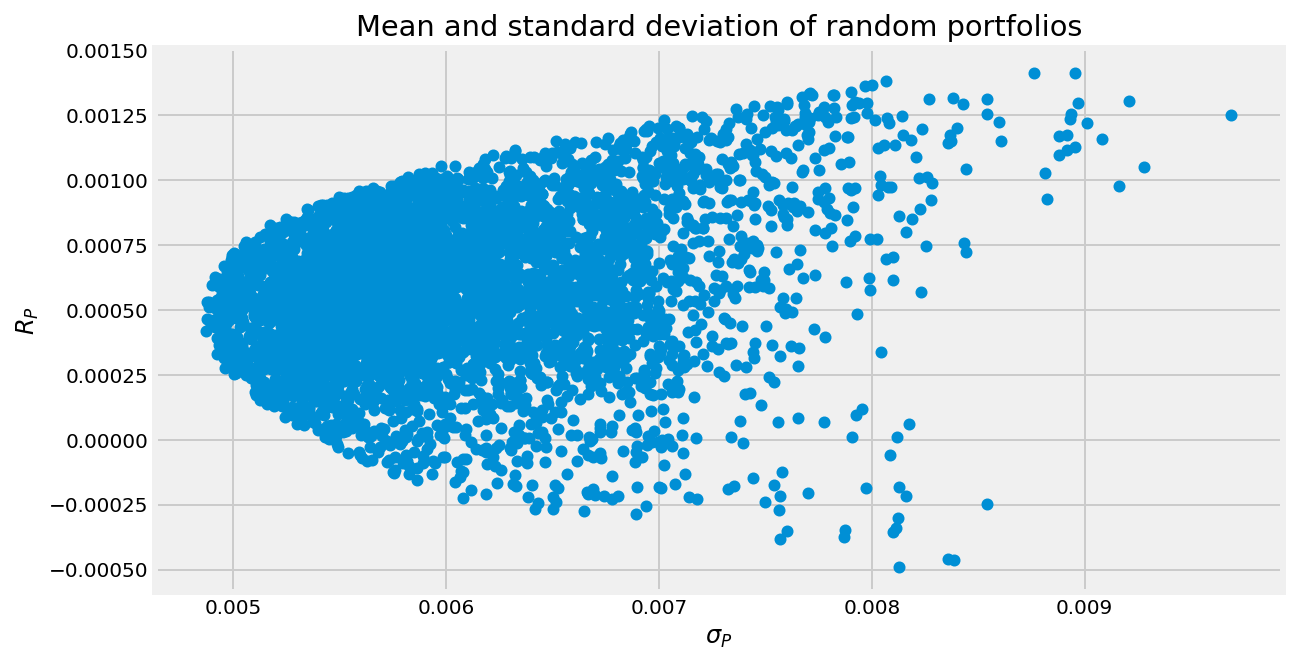

In [36]:
plt.figure(figsize=(9, 5))
plt.plot(stds, means, 'o', markersize=5)
plt.xlabel('$\sigma_P$')
plt.ylabel('$R_P$')
plt.title('Mean and standard deviation of random portfolios')

To solve the Markowitz optimization problem we will use a quadratic programming solver from cvxopt. It allows to solve numerically the quadratic optimization problem:  
$$
\min _{w \in \mathbb{R}^{d}} \frac{1}{2} w^{\top} P w+q^{\top} w
$$  
<center>subject to $ \quad G w \preceq h \quad $ and $ \quad A w=b $</center>  
where the inequalities are componentwise vector inequalities and $A, G, P$ are matrices and $b, h, q$ are vectors of suitable dimensions.

The Markowitz problem at hand can be recast in this form by setting  
$$ P=\lambda \Sigma, \quad q=-\mu, \quad G=-I_{d}, \quad h=0 \quad A=e^{\top}, \quad b=1 $$  


To compute the efficient frontier we solve the problem for different values $ \left(\lambda_{1}, \lambda_{2}, \ldots, \lambda_{N}\right) $

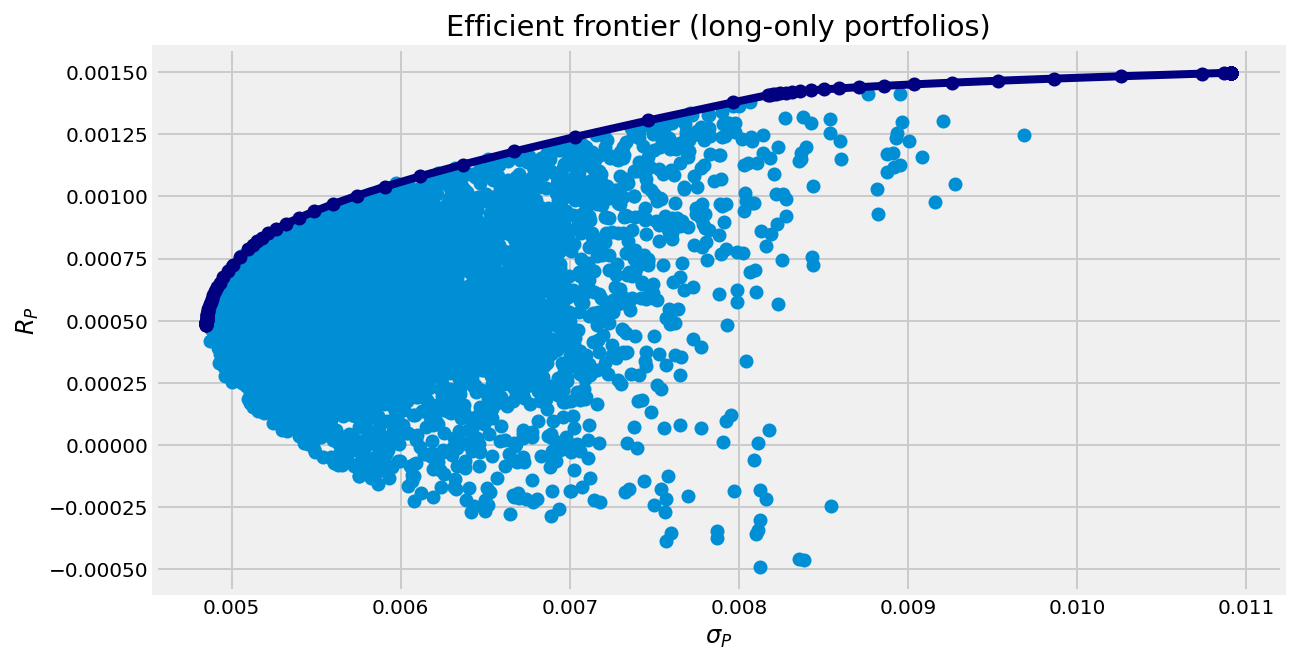

In [42]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cvxopt as opt
from cvxopt import blas, solvers
import pandas as pd
# Turn off progress printing
solvers.options['show_progress'] = False
def optimal_portfolio(returns):
    returnstranspose=returns.T # transpose returns dataframe
    d = len(returnstranspose) # number of assets
    ret = np.asmatrix(returnstranspose.values) #turn panda dataframe into matrix
    N = 100
    lambdas = [10**(5.0 * t/N - 1.0) for t in range(N)]
    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(ret))
    mubar = opt.matrix(np.mean(ret, axis=1))
    # Create constraint matrices
    G = -opt.matrix(np.eye(d)) # negative d x d identity matrix
    h = opt.matrix(0.0, (d ,1)) # d-vector of zeros
    A = opt.matrix(1.0, (1, d)) # d-row vector of ones
    b = opt.matrix(1.0) # scalar 1
    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(lamb*S, -mubar, G, h, A, b)['x'] for lamb in lambdas]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns_p = [blas.dot(mubar, x) for x in portfolios]
    risks_p = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns_p, risks_p, 2)
    return portfolios, returns_p, risks_p
portfolios, ret, risks=optimal_portfolio(returns)
plt.figure(figsize=(9, 5))
plt.plot(stds, means, 'o')
plt.xlabel('$\sigma_P$')
plt.ylabel('$R_P$')
plt.title('Efficient frontier (long-only portfolios)')
plt.plot(risks, ret, 'o-y',color='navy')

Approximate Minimum variance and maximum Sharpe portfolios

In [45]:
## Approximate Max sharpe
sharpe=[(x*1.0)/y for x, y in zip(ret, risks)] #divide two lists to get sharpe ratio
N_Sharpe=np.argmax(sharpe)
w_sharpe=portfolios[N_Sharpe]
#Approxmiate Markowitz
w_mv=portfolios[-1]
print("Minimum Variance Allocation\n")
print(stocks)
print(w_mv.T)
print("-"*80)
print("Maximum Sharpe Ratio Portfolio Allocation\n")
print(stocks)
print(w_sharpe.T)

Minimum Variance Allocation

['AAPL', 'GE', 'JPM', 'KO']
[ 1.30e-01  1.38e-01  1.83e-01  5.49e-01]

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

['AAPL', 'GE', 'JPM', 'KO']
[ 3.24e-01  6.93e-06  4.30e-01  2.47e-01]



Add Min Variance and Max Sharp to the previous graph.

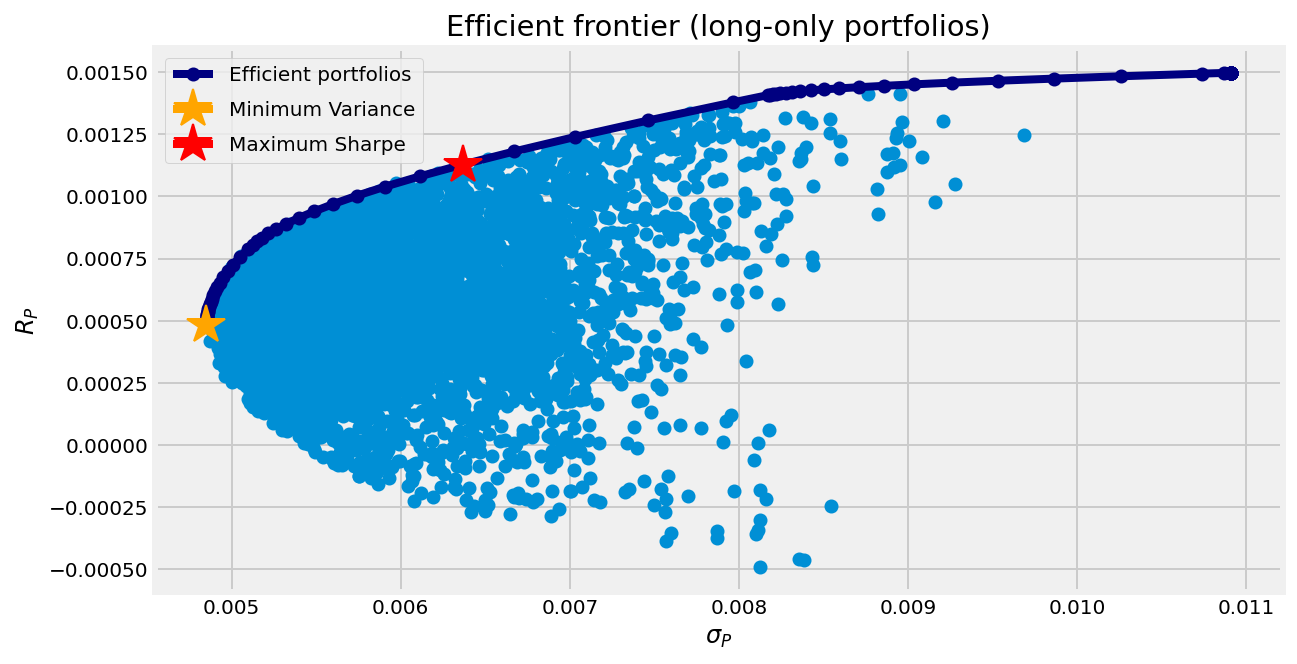

In [46]:
plt.figure(figsize=(9, 5))
plt.plot(stds, means, 'o')
plt.xlabel('$\sigma_P$')
plt.ylabel('$R_P$')
plt.title('Efficient frontier (long-only portfolios)')
plt.plot(risks, ret, 'o-y',color='navy', label='Efficient portfolios')
plt.plot(risks[-1], ret[-1],color='orange', marker='*',markersize=20,label='Minimum Variance')
plt.plot(risks[N_Sharpe], ret[N_Sharpe],color='red', marker='*',markersize=20,label='Maximum Sharpe')
plt.legend(labelspacing=0.8)

## Limitations of Markowitz

### Concentrated portfolios

Minimum variance or 1 portfolio

In [48]:
print('Maximum Sharpe')
print(w_sharpe)

Maximum Sharpe
[ 3.24e-01]
[ 6.93e-06]
[ 4.30e-01]
[ 2.47e-01]



### Gaussian assumption and first two moments

In [49]:
#We will look at stock prices over 4 years
start = '2013-10-01'
end = '2017-09-30'
stocks = ['AAPL','GE','JPM','KO']
stocks = ['AAPL','GE','JPM','KO','GOOG','FB','AMZN'] #Add more stocks to show sparsity of efficient frontier
data = fy.download(stocks, start, end, paginate=True)

[*********************100%***********************]  7 of 7 completed


In [50]:
dataClose=data.Close
dataClose.head()
returns = dataClose.apply(lambda x: (x / (x.shift(1)))-1) # shift moves dates back by 1.
returns.head()
returns=returns.iloc[1:] #drop first row
returns.head()

,AAPL,AMZN,FB,GE,GOOG,JPM,KO
Date,,,,,,,
2013-10-01,0.023513,0.026580,0.003783,0.011720,0.012661,0.005223,0.001848
2013-10-02,0.003279,-0.001371,-0.002777,0.006620,0.001116,0.002502,-0.013702
2013-10-03,-0.012562,-0.017940,-0.021877,-0.009453,-0.013401,-0.002880,-0.007213
2013-10-04,-0.000786,0.013598,0.037820,-0.002075,-0.004269,0.014055,0.001076
2013-10-07,0.009772,-0.028241,-0.010188,-0.004574,-0.007577,-0.015948,-0.004032


Higher order moments: Skewness and Kurtosis of data

In [51]:
from scipy.stats import skew
from scipy.stats import kurtosis
print('Skewness:')
print(returns.skew())
print('')
print('Kurtosis:')
print(returns.kurtosis())

Skewness:
AAPL   -0.034895
AMZN    0.569958
FB      0.860231
GE      0.944446
GOOG    2.212632
JPM     0.107977
KO     -0.751890
dtype: float64

Kurtosis:
AAPL     4.357759
AMZN    11.228308
FB       9.406811
GE       9.707095
GOOG    23.616068
JPM      3.757206
KO       4.795667
dtype: float64


Let’s plot the empirical distribution and fit a Gaussian distribution

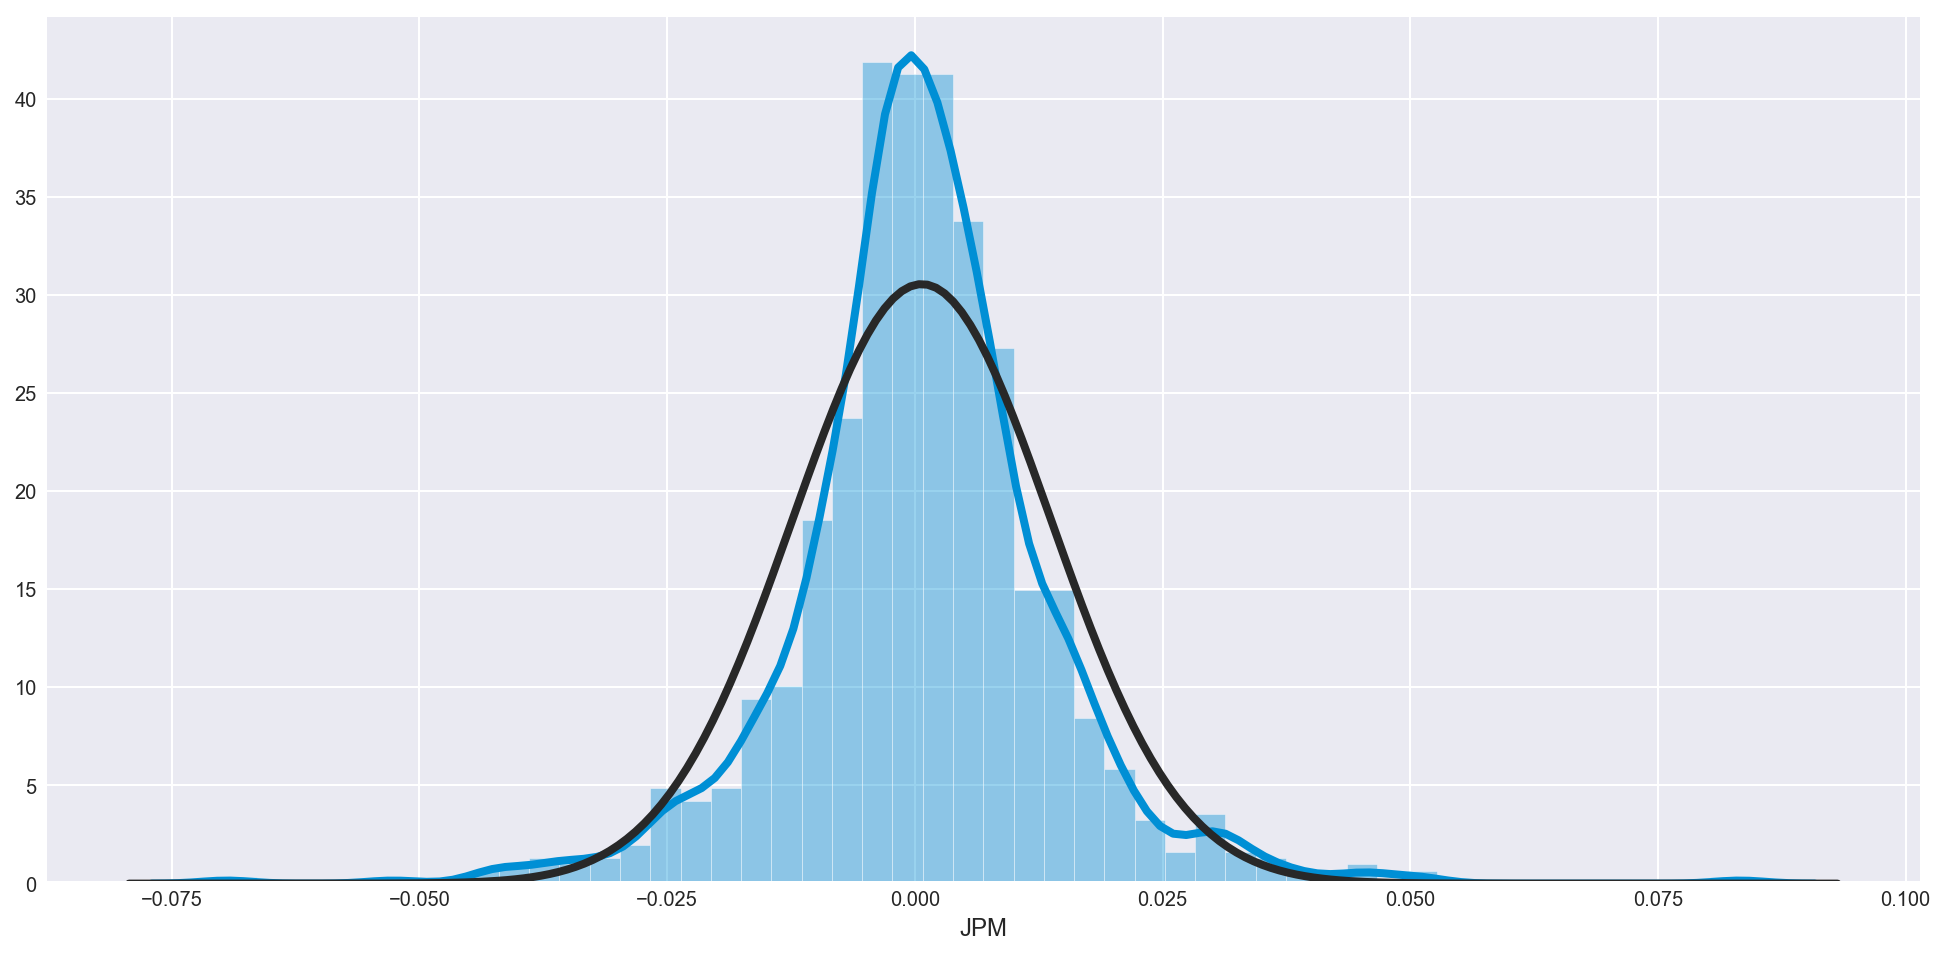

In [52]:
from scipy import stats
plt.figure(figsize=(15, 8))
sns.set_style('darkgrid')
sns.distplot(returns.JPM, fit=stats.norm, kde=True) #kde=False to remove kernel density estimation